In [150]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from pylab import mpl, plt

In [151]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [152]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [153]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [176]:
df_analise = get_ohlc('MBLY3', mt5.TIMEFRAME_D1, 500)

In [177]:
df_analise

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2021-02-05,26.00,28.33,24.71,26.40,33922,1,13274300
2021-02-08,26.55,27.00,25.00,25.12,7555,1,2325700
2021-02-09,25.00,26.40,22.71,26.40,9736,1,2560200
2021-02-10,25.87,26.12,23.70,23.81,9211,1,1907900
2021-02-11,23.85,24.34,22.56,22.56,4990,1,1219100
...,...,...,...,...,...,...,...
2022-01-31,6.27,6.38,6.02,6.38,1561,1,443400
2022-02-01,6.35,6.58,6.24,6.58,1124,1,297600
2022-02-02,6.54,6.68,6.45,6.50,3034,1,493100


In [178]:
df_analise['M20'] = ta.sma(df_analise['close'], length=20)
df_analise['M50'] = ta.sma(df_analise['close'], length=50)
df_analise['M200'] = ta.sma(df_analise['close'], length=200)

In [179]:
#inicialmente teste com 1000ticks
df_analise['Dist20'] = df_analise['close'] - df_analise['M20'] 
df_analise['Dist50'] = df_analise['close'] - df_analise['M50']
df_analise['Dist200'] = df_analise['close'] - df_analise['M200']

In [180]:
df = df_analise
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2021-02-05,26.00,28.33,24.71,26.40,33922,1,13274300,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-08,26.55,27.00,25.00,25.12,7555,1,2325700,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09,25.00,26.40,22.71,26.40,9736,1,2560200,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,25.87,26.12,23.70,23.81,9211,1,1907900,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-11,23.85,24.34,22.56,22.56,4990,1,1219100,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,6.27,6.38,6.02,6.38,1561,1,443400,4.8715,5.1020,11.26430,1.5085,1.2780,-4.88430
2022-02-01,6.35,6.58,6.24,6.58,1124,1,297600,4.9875,5.1098,11.19300,1.5925,1.4702,-4.61300
2022-02-02,6.54,6.68,6.45,6.50,3034,1,493100,5.0955,5.1168,11.12355,1.4045,1.3832,-4.62355


In [181]:
df = df[df['real_volume'] > 0]
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2021-02-05,26.00,28.33,24.71,26.40,33922,1,13274300,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-08,26.55,27.00,25.00,25.12,7555,1,2325700,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09,25.00,26.40,22.71,26.40,9736,1,2560200,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,25.87,26.12,23.70,23.81,9211,1,1907900,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-11,23.85,24.34,22.56,22.56,4990,1,1219100,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,6.27,6.38,6.02,6.38,1561,1,443400,4.8715,5.1020,11.26430,1.5085,1.2780,-4.88430
2022-02-01,6.35,6.58,6.24,6.58,1124,1,297600,4.9875,5.1098,11.19300,1.5925,1.4702,-4.61300
2022-02-02,6.54,6.68,6.45,6.50,3034,1,493100,5.0955,5.1168,11.12355,1.4045,1.3832,-4.62355


In [182]:
def percentil(data, up=90, down=10):
    x = data
    x = x.dropna()
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

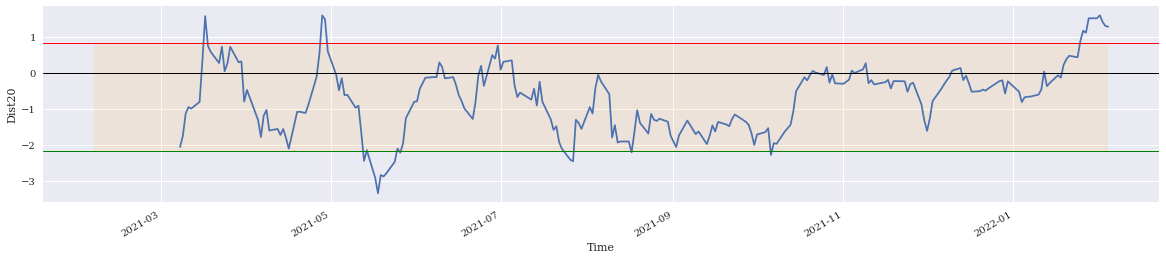

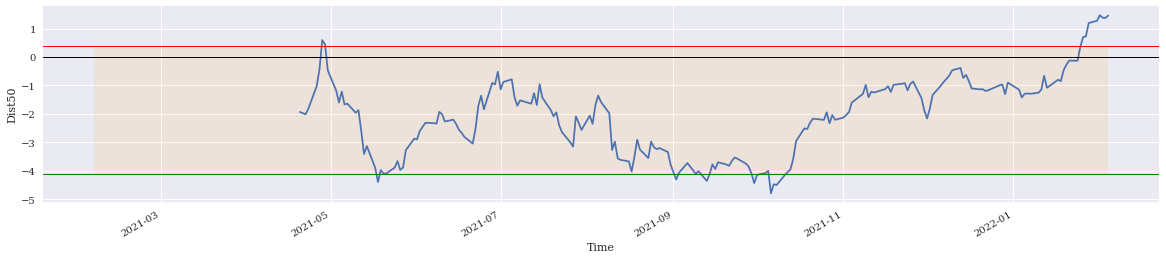

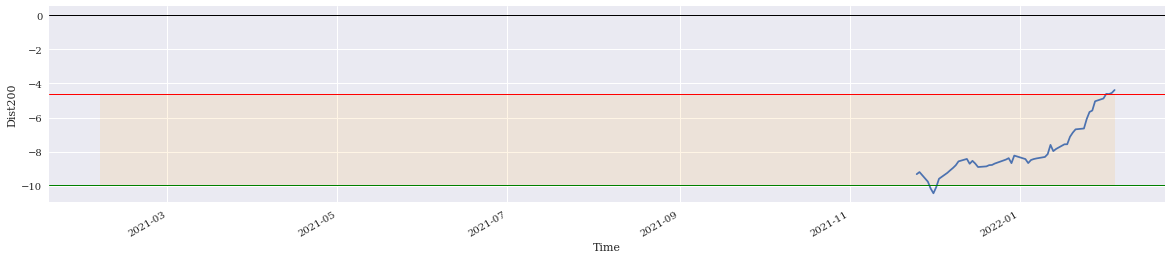

In [183]:
plt.rcParams['figure.figsize'] = (20,4)
# parametros percentil
up = 95
down = 5

per_m20 = percentil(df['Dist20'], up, down)
ax = df['Dist20'].plot()
ax.fill_between(df.index, per_m20[0], per_m20[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m20[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m20[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist20')
plt.show()

per_m50 = percentil(df['Dist50'], up, down)
ax = df['Dist50'].plot()
ax.fill_between(df.index, per_m50[0], per_m50[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m50[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_m50[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist50')
plt.show()

per_m200 = percentil(df['Dist200'], up, down)
ax = df['Dist200'].plot()
ax.fill_between(df.index, per_m200[0], per_m200[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m200[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m200[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist200')
plt.show()

In [184]:
df['Dist20'].describe()

count    230.000000
mean      -0.721091
std        0.960012
min       -3.339500
25%       -1.450875
50%       -0.617000
75%       -0.120500
max        1.592500
Name: Dist20, dtype: float64

In [185]:
df['Dist50'].describe()

count    200.000000
mean      -2.070259
std        1.391547
min       -4.792800
25%       -3.258550
50%       -1.946600
75%       -1.131250
max        1.470200
Name: Dist50, dtype: float64

In [186]:
df['Dist200'].describe()

count    50.000000
mean     -7.914909
std       1.580362
min     -10.446250
25%      -8.801437
50%      -8.437100
75%      -7.241150
max      -4.385650
Name: Dist200, dtype: float64